# 차원 축소
## 필요 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler       #PCA 전 특성에 대한 스케일링
from sklearn.decomposition import PCA   # 주성분 분석 패키지
from sklearn.manifold import TSNE
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'

sns.set(font=font_family, rc={'axes.unicode_minus' : False})

## 붓꽃 데이터 로드

In [2]:
# iris 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# 붓꽃 데이터 특성 확인
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 데이터프레임 변환

In [4]:
# 데이터 생성 및 준비
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sy = pd.Series(iris.target, drtpe='category')
# sy = sy.cat.rename_categories(iris.target_names)
# df['species'] = sy

df['target'] = iris.target

# 필터명 정의
cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## iris data 시각화

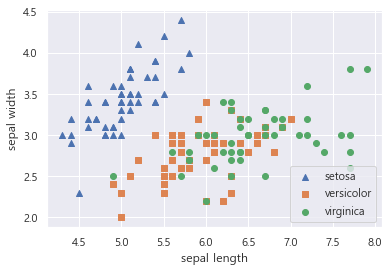

In [5]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor의 target값은 1, virginica의 target값은 2.
# 각 target별로 다른 shape으로 scatter plot

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal length (cm)']
    y_axis_data = df[df['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## 주성분 분석(PCA)

In [6]:
# 개별 속성을 함께 스케일링
# PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요

iris_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])

In [7]:
# n_components : PCA로 변환할 차원의 수

pca = PCA(n_components=2)

# fit()과 transform()을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [9]:
# 원본 데이터와 PCA데이터로 분류 모델 실행
# 랜덤포레스트 알고리즘 , 교차검증 수행

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [10]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(f'원본 데이터 교차 검증 정확도 : {scores}')
print(f'원본 데이터 교차 검증 평균 정확도 : {np.mean(scores)}')

원본 데이터 교차 검증 정확도 : [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도 : 0.96


In [11]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(f'PCA 데이터 교차 검증 정확도 : {scores_pca}')
print(f'PCA 데이터 교차 검증 평균 정확도 : {np.mean(scores_pca)}')

PCA 데이터 교차 검증 정확도 : [0.88 0.88 0.88]
PCA 데이터 교차 검증 평균 정확도 : 0.88


## t-SNE

In [12]:
# 데이터프레임 확인
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)    #FutureWarning 제거

# class target 정보 제외
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components=2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])

In [15]:
tsne_df.head()

,component 0,component 1
0,-17.337639,-6.689819
1,-14.995592,-5.872775
2,-14.675938,-6.906576
3,-14.410111,-6.668876
4,-17.361380,-7.164054


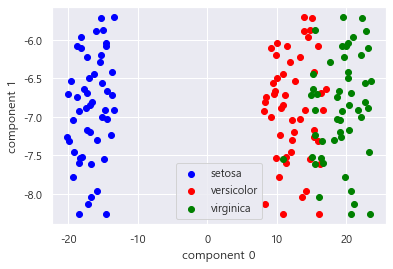

In [16]:
# class target 정보 불러오기
tsne_df['target'] = df['target']

# target별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'blue', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_0['component 1'], color = 'red', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_0['component 1'], color = 'green', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()